# Change Status Reason Prediction Model

## Explanatory Data Analysis

In [2]:
import pandas as pd

# Making data frame from excel file
original_dataframe = pd.read_excel("NCM-Change Management - Results - CISCO.xlsx")

In [3]:
# Keep rows that have Cisco Engineering as a Vendor
original_dataframe = original_dataframe[original_dataframe['Vendor Name'] == 'Cisco Engineering']

# Take a look at the data being worked with
original_dataframe.head()

,Change,Link,Change Summary,Change Summary Requirements,Derived Change Category,Change Risk Level,Change Class,Change Status,Change Status Reason,Change Status Reason - Enriched,...,Change Manager Hierarchy,Change Manager Level 5 Name,Change Manager Level 4 Name,Change Manager Level 3 Name,Change Manager Level 2 Name,ChangeLink,Change Link,OusideRange,NCM,FailedChangeReport
0,CRQ000011207332,CRQ000011207332,NA3RC Cleanup to push ISE authentication chang...,AMRS-NEC-DN(L)MODIFY-Router-ILW-268-CTO,NA3RC Project,Risk Level 3,Normal,Closed,Successful,Successful,...,MOYNIHAN/BESSANT/REILLY/KERRISON/WALKER/MCCARR...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011207332#https://itsm-webapp.bankofamer...,False,True,True
1,CRQ000009568701,CRQ000009568701,STD-GLB-NETW- SDWAN Branch Transformation - Ba...,NaN,NaN,Risk Level 2,Standard,Closed,Successful with Issues,Successful with Issues,...,MOYNIHAN/BESSANT/REILLY/KERRISON/WALKER/MCCARR...,"NEWELL, JOHN A.","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000009568701#https://itsm-webapp.bankofamer...,False,True,True
2,CRQ000011239694,CRQ000011239694,STD-GLB-NETW-Cable Installation,NaN,CABLING,Risk Level 2,Standard,Closed,Successful,Successful,...,MOYNIHAN/BESSANT/REILLY/KERRISON/WALKER/MCCARR...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011239694#https://itsm-webapp.bankofamer...,False,True,True
3,CRQ000011323252,CRQ000011323252,STD-GLB-NETW-Cable Installation -TXW-D17,AMRS-STD-DN(P)Cabling support-TXW-D17-GT&O(FNJ),SWITCH,Risk Level 2,Standard,Closed,Successful,Successful,...,MOYNIHAN/BESSANT/REILLY/KERRISON/WALKER/MCCARR...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011323252#https://itsm-webapp.bankofamer...,False,True,True
4,CRQ000011323650,CRQ000011323650,STD-GLB-NETW-Cable Installation - VAW-363,AMRS-STD-DN(P)Cabling support-VAW-363 -GT&O(FNJ),SWITCH,Risk Level 2,Standard,Closed,Successful,Successful,...,MOYNIHAN/BESSANT/REILLY/KERRISON/WALKER/MCCARR...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011323650#https://itsm-webapp.bankofamer...,False,True,True


In [4]:
# Examine all types of Change Status that can occur in a Network Change
original_dataframe['Change Status Reason - Enriched'].unique()

array(['Successful', 'Successful with Issues', 'Backed Out',
       'unsuccessful', 'Caused Incident with Impact', 'Caused Incident',
       'Unsuccessful'], dtype=object)

In [182]:
# As seen above, data has split 'unsuccessful' and 'Unsuccessful'
# Clearly manual error; must fix by replacing all of them to one syntax
original_dataframe.loc[ original_dataframe['Change Status Reason - Enriched'] == 'unsuccessful', 'Change Status Reason - Enriched'] = 'Unsuccessful'
# original_dataframe.loc[ original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact', 'Change Status Reason - Enriched'] = 'Caused Incident'

# Check to see if change worked
original_dataframe['Change Status Reason - Enriched'].unique()

array(['Successful', 'Successful with Issues', 'Backed Out',
       'Unsuccessful', 'Caused Incident with Impact', 'Caused Incident'],
      dtype=object)

In [183]:
# Amount of rows in data frame
print("Amount of rows: " + str(len(original_dataframe.index)))

Amount of rows: 22316


In [184]:
# Get copy of original_dataframe
df = original_dataframe.copy()

In [185]:
# Check new df and if all dependent variables are there
df['Change Status Reason - Enriched'].unique()

array(['Successful', 'Successful with Issues', 'Backed Out',
       'Unsuccessful', 'Caused Incident with Impact', 'Caused Incident'],
      dtype=object)

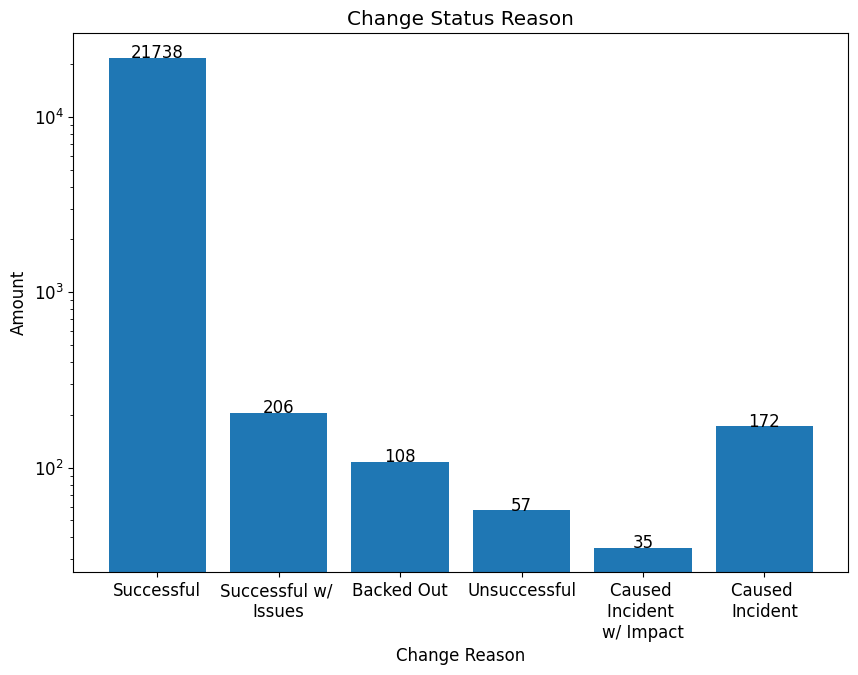

In [186]:
# Graph the results

import matplotlib.pyplot as plt
import numpy as np

# Function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# Store all types of change status
change_status = df['Change Status Reason - Enriched'].unique()

# Create lists
xList = ['Successful', 
         'Successful w/ \nIssues', 
         'Backed Out',
         'Unsuccessful', 
         'Caused \nIncident \nw/ Impact', 
         'Caused \nIncident']
yList = []

# Add amounts to yList
for status in change_status:
    yList.append(df['Change Status Reason - Enriched'].value_counts()[status])

# Plot graph
plt.rcParams.update({'font.size': 12})

plt.figure(figsize = (10, 7)) # setting figure size by using figure() function
plt.bar(xList, yList) # simply having this line of code will generate the figure
plt.yscale('log') # set graph to logaraithmic y axis
addlabels(xList, yList) # calling the function to add value labels
plt.title("Change Status Reason") # set the title of the figure
plt.xlabel("Change Reason") # x-axis label
plt.ylabel("Amount") # y-axis label

plt.show() # display the figure

In [187]:
df = df[df['Change Status Reason - Enriched'] != 'Successful with Issues']
df = df[df['Change Status Reason - Enriched'] != 'Backed Out']

df['Change Status Reason - Enriched'].unique()

array(['Successful', 'Unsuccessful', 'Caused Incident with Impact',
       'Caused Incident'], dtype=object)

## Data Preprocessing

In [188]:
df[df.columns[df.isna().any()]]

,Change Summary Requirements,Derived Change Category,Failed Change Root Cause,Incident Number,Incident Priority,Change Sheduled for Approval Date,Change Operational Categorization Tier 1,Change Operational Categorization Tier 2,Change Operational Categorization Tier 3,Change Product Category Tier 1,Change Product Category Tier 2,Change Product Category Tier 3
0,AMRS-NEC-DN(L)MODIFY-Router-ILW-268-CTO,NA3RC Project,NaN,NaN,NaN,2019-12-09 21:49:59,MODIFY,NETWORK,DATA,NETWORK INFRASTRUCTURE,NETWORK,ROUTER
2,NaN,CABLING,NaN,NaN,NaN,2019-12-13 11:44:45,INSTALL,NETWORK,CABLING,COLLECTION,LOGICAL CI,FACILITIES
3,AMRS-STD-DN(P)Cabling support-TXW-D17-GT&O(FNJ),SWITCH,NaN,NaN,NaN,2019-12-23 13:48:55,INSTALL,NETWORK,CABLING,COLLECTION,LOGICAL CI,FACILITIES
4,AMRS-STD-DN(P)Cabling support-VAW-363 -GT&O(FNJ),SWITCH,NaN,NaN,NaN,2019-12-23 13:49:49,INSTALL,NETWORK,CABLING,COLLECTION,LOGICAL CI,FACILITIES
5,AMRS-STD-DN(P)ADD-Rack & Stack data Equipment ...,SWITCH,NaN,NaN,NaN,2019-12-23 13:31:50,ADD,NETWORK,HARDWARE,COLLECTION,LOGICAL CI,FACILITIES
...,...,...,...,...,...,...,...,...,...,...,...,...
36770,AMRS-NML-DN(L)CONFIGURE-Switch-MULTI-MULTI,SWITCH,NaN,NaN,NaN,2022-06-16 23:10:28,BACKUP,NETWORK,PORT,NETWORK INFRASTRUCTURE,NETWORK,SWITCH
36780,NaN,SWITCH,NaN,NaN,NaN,2022-06-21 15:53:46,ADD,NETWORK,PORT,COLLECTION,LOGICAL CI,FACILITIES
36782,AMRS-NML-DN(L)DECOMMISSION-Router-AZ1-806-MULT...,ROUTER,NaN,NaN,NaN,2022-06-21 11:51:08,DECOMMISSION,NETWORK,INTERFACE,NETWORK INFRASTRUCTURE,NETWORK,SWITCH
36784,AMRS-NML-DN(LP)CONFIGURE-Data Center Backbone ...,SWITCH,NaN,NaN,NaN,2022-06-21 13:12:18,CONFIGURE,NETWORK,DEVICE,NETWORK INFRASTRUCTURE,NETWORK,SWITCH


In [189]:
# Drop columns with N/A values and that are not important/needed for our models
df = df.drop(['Change Summary Requirements', 'Failed Change Root Cause', 'Incident Number', 'Incident Priority'], axis=1)

In [190]:
# Fill in remaining columns who have N/A values with 'NaN'
df = df.fillna('NaN')

In [191]:
# Check isna()
df.isna().sum()

# Timestamp object is fine to have N/A values

Change                                       0
Link                                         0
Change Summary                               0
Derived Change Category                      0
Change Risk Level                            0
Change Class                                 0
Change Status                                0
Change Status Reason                         0
Change Status Reason - Enriched              0
Vendor Name                                  0
Change Sheduled for Approval Date           11
Change Scheduled Start Dt                    0
Change Scheduled Start Year                  0
Change Scheduled Start Month                 0
Change Scheduled End Dt                      0
Change Scheduled End Year                    0
Change Scheduled End Month                   0
Change Actual Start Dt                       0
Change Actual Start Year                     0
Change Actual Start Month                    0
Start Month Num                              0
Start Month  

In [192]:
# Calculate number of days network change was done in
from datetime import datetime
date_format = "%m/%d/%Y"

result =[]

for index, row in df.iterrows():
    a = row['Change Actual Start Dt']
    b = row['Change Actual End Dt']
    delta = b - a
    result.append(delta.days)

df['Days'] = result

# Add column to df after enumerating categorical values
df.head()

,Change,Link,Change Summary,Derived Change Category,Change Risk Level,Change Class,Change Status,Change Status Reason,Change Status Reason - Enriched,Vendor Name,...,Change Manager Level 5 Name,Change Manager Level 4 Name,Change Manager Level 3 Name,Change Manager Level 2 Name,ChangeLink,Change Link,OusideRange,NCM,FailedChangeReport,Days
0,CRQ000011207332,CRQ000011207332,NA3RC Cleanup to push ISE authentication chang...,NA3RC Project,Risk Level 3,Normal,Closed,Successful,Successful,Cisco Engineering,...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011207332#https://itsm-webapp.bankofamer...,False,True,True,25
2,CRQ000011239694,CRQ000011239694,STD-GLB-NETW-Cable Installation,CABLING,Risk Level 2,Standard,Closed,Successful,Successful,Cisco Engineering,...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011239694#https://itsm-webapp.bankofamer...,False,True,True,10
3,CRQ000011323252,CRQ000011323252,STD-GLB-NETW-Cable Installation -TXW-D17,SWITCH,Risk Level 2,Standard,Closed,Successful,Successful,Cisco Engineering,...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011323252#https://itsm-webapp.bankofamer...,False,True,True,6
4,CRQ000011323650,CRQ000011323650,STD-GLB-NETW-Cable Installation - VAW-363,SWITCH,Risk Level 2,Standard,Closed,Successful,Successful,Cisco Engineering,...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011323650#https://itsm-webapp.bankofamer...,False,True,True,6
5,CRQ000011323646,CRQ000011323646,STD-GLB-NETW-RACKANDSTACK-ADD - VAW-363,SWITCH,Risk Level 2,Standard,Closed,Successful,Successful,Cisco Engineering,...,"SISTO, NICOLA A.(NICK)","MCCARREN, PATRICK","KERRISON, ANTONY R.","REILLY, DAVID",https://itsm-webapp.bankofamerica.com/arsys/se...,CRQ000011323646#https://itsm-webapp.bankofamer...,False,True,True,6


In [193]:
# Remove columns which should obviously not be used for model training/testing
df = df.drop(['Change', 
              'Link', 
              'Change Summary', 
              'Change Status Reason', 
              'Vendor Name', 
              'Change with Business Impact Flag', 
              'Change Manager Hierarchy'], axis = 1)

In [194]:
# Enumerate the following columns in order for the models to take values as input
df['Change Impact'] = df['Change Impact'].str.extract('(\d+)').astype(int)
df['Change Risk Level'] = df['Change Risk Level'].str.extract('(\d+)').astype(int)
df['Change Urgency'] = df['Change Urgency'].str.extract('(\d+)').astype(int)


# Every other variable is categorical
# We need to encode them so that our models can take its values as input
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df:
    le.fit(df[column])
    df[column] = le.transform(df[column])
    
# Print all unique change status reasons
df['Change Status Reason - Enriched'].unique()

array([2, 3, 1, 0])

In [195]:
# Examine dataframe
df.head()

,Derived Change Category,Change Risk Level,Change Class,Change Status,Change Status Reason - Enriched,Change Sheduled for Approval Date,Change Scheduled Start Dt,Change Scheduled Start Year,Change Scheduled Start Month,Change Scheduled End Dt,...,Change Manager Level 5 Name,Change Manager Level 4 Name,Change Manager Level 3 Name,Change Manager Level 2 Name,ChangeLink,Change Link,OusideRange,NCM,FailedChangeReport,Days
0,12,2,2,0,2,9,0,0,2,41,...,19,12,4,4,683,687,0,1,0,25
2,1,1,3,0,2,17,1,0,2,2,...,19,12,4,4,711,697,0,1,0,10
3,17,1,3,0,2,69,2,0,2,0,...,19,12,4,4,844,839,0,1,0,6
4,17,1,3,0,2,70,2,0,2,0,...,19,12,4,4,856,843,0,1,0,6
5,17,1,3,0,2,66,2,0,2,0,...,19,12,4,4,833,842,0,1,0,6


In [196]:
# Examine columns which are producing errors when using SelectKBest function
# df.iloc[:, [12, 40, 61]]

In [197]:
# Target (Dependent) and Data (Independent) Values
target = df['Change Status Reason - Enriched']
data = df.drop(['Change Status Reason - Enriched', 'FailedChangeReport', 'NCM'], axis=1)

In [198]:
# We drop 'Change with Business Impact Flag', 'FailedChangeReport', and 'Vendor Name' in the data df because:
# - Will not benefit the models
# - Generates these warnings:
#     UserWarning: Features [12 40 61] are constant.
#         warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
#     RuntimeWarning: divide by zero encountered in divide
#         f = msb / msw 
#     RuntimeWarning: invalid value encountered in divide
#         f = msb / msw

In [199]:
# Feature selection to see which independent variables are best to use
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

bestfeatures = SelectKBest(k='all')
fit = bestfeatures.fit(data, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(20,'Score'))

                                     Feature      Score
1                          Change Risk Level  69.725895
2                               Change Class  55.505472
30                            Change Urgency  29.107192
49                                      Days  28.959480
29                           Change Priority  28.019887
31  Change Operational Categorization Tier 1  27.402168
28                             Change Impact  25.528219
37                     Change Manager Region   8.940054
34            Change Product Category Tier 1   7.933568
44               Change Manager Level 3 Name   7.636699
36            Change Product Category Tier 3   6.425455
45               Change Manager Level 2 Name   6.155682
43               Change Manager Level 4 Name   6.057800
26                      Change Manager Email   5.555341
42               Change Manager Level 5 Name   4.976420
47                               Change Link   4.520085
46                                ChangeLink   4

In [200]:
# Take a random sample of the successfuls so that machine doesn't over predict successful
successful_df = df[df["Change Status Reason - Enriched"]==2]
successful_df = successful_df.sample(n = 600, random_state=79312830)
len(successful_df.index)

not_successful_df = df[df["Change Status Reason - Enriched"]!=2]
len(not_successful_df.index)

# Concatinate dataframe from the two filtered dataframe
frames = [successful_df, not_successful_df]
df = pd.concat(frames)

# Amount of rows in new data frame
len(df.index)

864

In [201]:
# New target and data values
target = df['Change Status Reason - Enriched']
data = df.drop('Change Status Reason - Enriched', axis=1)

In [202]:
# Include top ten features that will be used based on SelectKBest function
features_list_df = data
#[["Change Risk Level", "Change Class", "Change Impact", "Change Urgency", "Days", "Change Priority", "Change Operational Categorization Tier 1"]]
                         #, "Change Product Category Tier 3", "Change Product Category Tier 1"]]
#, "Change Manager Region", "Derived Change Category"


# Reason 'Failed Change Root Cause' is not included is because this would defeat
# the purpose of the prediction model, as this is what occurs after a network change
# has been made. Model is used to predict outcome of the network change prior to 
# a failure occurs, hence root cause should not be accounted for.
# 'Change Status Reason' also removed because it would be giving the model the dependent
# variable needed to make a decision

In [203]:
# Independent and dependent variables to numpy array 
X = features_list_df.to_numpy()
y = target.to_numpy()

## Classification Modeling

In [204]:
# Split train and test data
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()
# scaled_X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [205]:
# Amount of train and test data
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(648, 52) (648,)
(216, 52) (216,)


In [206]:
# Amount for each change status reason being trained
from collections import Counter

print('Original train dataset shape %s' % Counter(y_train))

Original train dataset shape Counter({2: 444, 0: 132, 3: 40, 1: 32})


In [207]:
# Use SMOTE for oversampling issues in the data
from imblearn.over_sampling import SMOTE

# SMOTE: Synthetic Minority Oversampling Technique Model
sm = SMOTE(random_state=21)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print('Resampled SMOTE train dataset shape %s' % Counter(y_sm))
print (X_sm.shape, y_sm.shape)

Resampled SMOTE train dataset shape Counter({1: 444, 2: 444, 3: 444, 0: 444})
(1776, 52) (1776,)


In [208]:
# Import classifiers and metrics from sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [209]:
# Initialize the models
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Train ML model with training dataset using model.fit() function
neigh.fit(X_sm, y_sm)
svc.fit(X_sm, y_sm)
nbc.fit(X_sm, y_sm)
rfc.fit(X_sm, y_sm)

RandomForestClassifier()

In [210]:
# Training complete, test your model with testing dataset

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.17      0.25      0.20        40
           1       0.00      0.00      0.00         3
           2       0.78      0.40      0.53       156
           3       0.19      0.41      0.26        17

    accuracy                           0.37       216
   macro avg       0.29      0.26      0.25       216
weighted avg       0.61      0.37      0.44       216

              precision    recall  f1-score   support

           0       0.22      0.33      0.26        40
           1       0.02      0.67      0.04         3
           2       0.92      0.15      0.25       156
           3       0.03      0.06      0.04        17

    accuracy                           0.18       216
   macro avg       0.30      0.30      0.15       216
weighted avg       0.71      0.18      0.24       216

              precision    recall  f1-score   support

           0       0.25      0.35      0.29        40
           1       0.

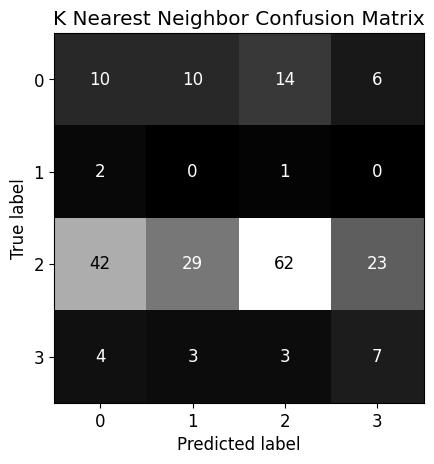

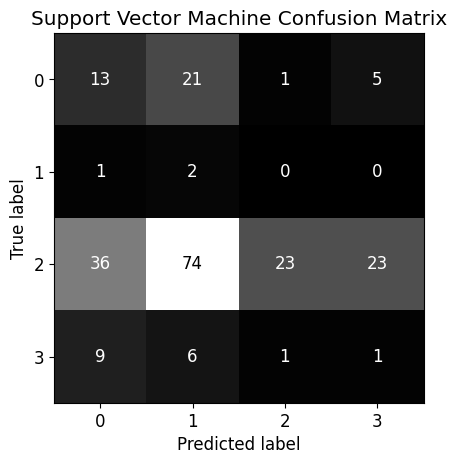

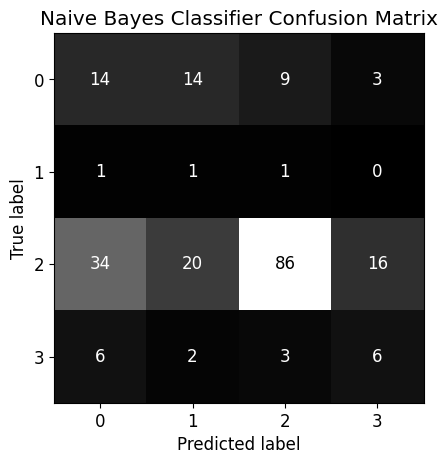

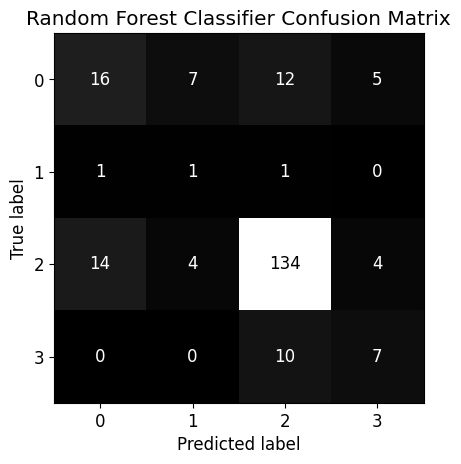

In [211]:
# Create confussion matrices for each model
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

## Important Variables - Correlation Between Variables and Change Status Reasons

In [221]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Risk Level'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Risk Level'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Risk Level'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Risk Level'].mode()
print(a)
print(b)
print(c)
print(d)

0    Risk Level 4
Name: Change Risk Level, dtype: object
0    Risk Level 2
Name: Change Risk Level, dtype: object
0    Risk Level 4
Name: Change Risk Level, dtype: object
0    Risk Level 4
Name: Change Risk Level, dtype: object


In [222]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Class'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Class'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Class'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Class'].mode()
print(a)
print(b)
print(c)
print(d)

0    Normal
Name: Change Class, dtype: object
0    Normal
Name: Change Class, dtype: object
0    Normal
Name: Change Class, dtype: object
0    Normal
Name: Change Class, dtype: object


In [223]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Urgency'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Urgency'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Urgency'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Urgency'].mode()
print(a)
print(b)
print(c)
print(d)

0    4-Low
Name: Change Urgency, dtype: object
0    4-Low
Name: Change Urgency, dtype: object
0    4-Low
Name: Change Urgency, dtype: object
0    1-Critical
Name: Change Urgency, dtype: object


In [224]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Priority'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Priority'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Priority'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Priority'].mode()
print(a)
print(b)
print(c)
print(d)

0    Low
Name: Change Priority, dtype: object
0    Low
Name: Change Priority, dtype: object
0    Low
Name: Change Priority, dtype: object
0    Critical
Name: Change Priority, dtype: object


In [225]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Operational Categorization Tier 1'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Operational Categorization Tier 1'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Operational Categorization Tier 1'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Operational Categorization Tier 1'].mode()
print(a)
print(b)
print(c)
print(d)

0    UPGRADE
Name: Change Operational Categorization Tier 1, dtype: object
0    CONFIGURE
Name: Change Operational Categorization Tier 1, dtype: object
0    CONFIGURE
Name: Change Operational Categorization Tier 1, dtype: object
0    CONFIGURE
Name: Change Operational Categorization Tier 1, dtype: object


In [226]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Impact'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Impact'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Impact'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Impact'].mode()
print(a)
print(b)
print(c)
print(d)

0    1-Extensive/Widespread
Name: Change Impact, dtype: object
0    4-Minor/Localized
Name: Change Impact, dtype: object
0    4-Minor/Localized
Name: Change Impact, dtype: object
0    1-Extensive/Widespread
Name: Change Impact, dtype: object


In [227]:
a = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident']['Change Operational Categorization Tier 3'].mode()
b = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Successful']['Change Operational Categorization Tier 3'].mode()
c = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Unsuccessful']['Change Operational Categorization Tier 3'].mode()
d = original_dataframe[original_dataframe['Change Status Reason - Enriched'] == 'Caused Incident with Impact']['Change Operational Categorization Tier 3'].mode()
print(a)
print(b)
print(c)
print(d)

0    DEVICE
Name: Change Operational Categorization Tier 3, dtype: object
0    DEVICE
Name: Change Operational Categorization Tier 3, dtype: object
0    DEVICE
Name: Change Operational Categorization Tier 3, dtype: object
0    HARDWARE
Name: Change Operational Categorization Tier 3, dtype: object
